In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

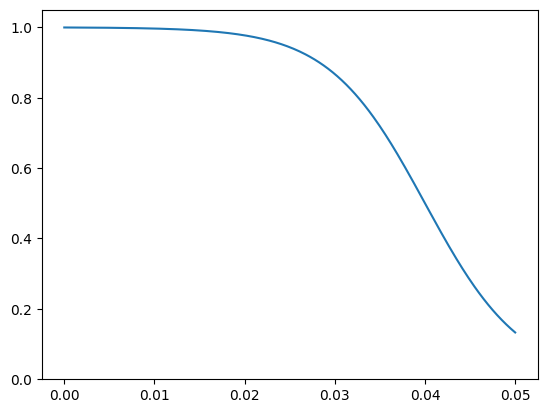

In [3]:
# Visualize soft threshold
threshold = .04
steepness = 7.5 / threshold
x = np.linspace(0, 0.05, 300)
y = 1 / (1 + np.exp(steepness * (x - threshold)))
fig, ax = plt.subplots()
ax.set_ylim(0, 1.05)
ax.plot(x, y)

In [52]:
df = pd.read_json(
    "../reports/contam_filtering_linear.jsonl", lines=True, orient="records"
)
df["preds"] = df["preds"].apply(np.array)
df["labels"] = df["labels"].apply(np.array)
df["is_anom"] = df["is_anom"].apply(np.array)

df["accuracy"] = df.apply(
    lambda row: (row["preds"] == row["labels"])[~row["is_anom"]].mean() * 100, axis=1
)

parameters = ["dataset", "anomaly_type", "p_anomaly", "threshold_quantile"]
dfm = df.groupby(parameters)["accuracy"].mean()
dfm

dataset         anomaly_type  p_anomaly  threshold_quantile
Covertype       ood_class     0.02       0.5000                92.182180
                                         0.9000                92.166884
                                         0.9500                92.169664
                                         0.9750                92.099431
                                         0.9875                92.130954
                                         1.0000                92.206986
                              0.04       0.5000                92.122275
                                         0.9000                92.141970
                                         0.9500                92.170006
                                         0.9750                92.143590
                                         0.9875                92.138255
                                         1.0000                92.157495
                              0.08       0.5000                9

In [35]:
df = pd.read_json(
    "../reports/contam_filtering_ctype.jsonl", lines=True, orient="records"
)
df["steepness"] = df["steepness"].fillna(np.inf)
df["preds"] = df["preds"].apply(np.array)
df["labels"] = df["labels"].apply(np.array)
df["loss_weights"] = df["loss_weights"].apply(np.array)
df["is_anom"] = df["is_anom"].apply(np.array)

df["accuracy"] = df.apply(
    lambda row: (row["preds"] == row["labels"])[~row["is_anom"]].mean() * 100, axis=1
)

parameters = ["dataset", "anomaly_type", "p_anomaly", "steepness", "threshold_quantile"]
dfm = df.groupby(parameters)["accuracy"].mean()

In [36]:
dfm.xs("Rotated MNIST", level=0).xs('ood_class', level=0)

p_anomaly  steepness  threshold_quantile
0.02       0.0        0.9000                92.067683
           15.0       0.9000                90.881134
                      0.9500                91.560559
                      0.9750                91.886955
                      0.9875                92.004179
           30.0       0.9000                90.115670
                      0.9500                91.160644
                      0.9750                91.674820
                      0.9875                91.965485
           60.0       0.9000                89.602853
                      0.9500                91.001768
                      0.9750                91.587642
                      0.9875                91.865334
           inf        0.9000                89.283513
                      0.9500                90.814441
                      0.9750                91.496141
                      0.9875                91.771785
0.04       0.0        0.9000             

In [ ]:
# Find best threshold for each config
dfr = dfm.reset_index()
dfr = dfr[dfr['dataset'] == 'Covertype']
idcs_best = dfr.groupby(['anomaly_type', 'p_anomaly', 'steepness'])['accuracy'].idxmax()
dfr.loc[idcs_best]

,dataset,anomaly_type,p_anomaly,steepness,threshold_quantile,accuracy
0,Covertype,feature_swap,0.02,0.0,0.9000,91.621812
4,Covertype,feature_swap,0.02,15.0,0.9875,91.552624
8,Covertype,feature_swap,0.02,30.0,0.9875,91.170465
12,Covertype,feature_swap,0.02,60.0,0.9875,90.798203
16,Covertype,feature_swap,0.02,inf,0.9875,90.516187
17,Covertype,feature_swap,0.04,0.0,0.9000,91.256289
20,Covertype,feature_swap,0.04,15.0,0.9750,91.639010
24,Covertype,feature_swap,0.04,30.0,0.9750,91.553332
29,Covertype,feature_swap,0.04,60.0,0.9875,91.498126
33,Covertype,feature_swap,0.04,inf,0.9875,91.464990


In [13]:
dfm = df.groupby(parameters)['accuracy'].mean()
dfm.xs('ood_class', level=0)

p_anomaly  steepness  threshold_quantile
0.02       0.0        0.9000                92.067212
                      0.9500                92.067212
                      0.9750                92.067212
                      0.9875                92.067212
           15.0       0.9000                91.667355
                      0.9500                91.832398
                      0.9750                91.808985
                      0.9875                91.980976
           30.0       0.9000                91.219055
                      0.9500                91.391744
                      0.9750                91.509958
                      0.9875                91.832617
           60.0       0.9000                90.815035
                      0.9500                91.115441
                      0.9750                91.282103
                      0.9875                91.623998
           inf        0.9000                90.348424
                      0.9500             